Fudhail M

IT-A 3122225002033

PRML Lab Ex9

Exploring Hyperparameters in Supervised Learning

Hyperparameters are the tunable settings that affect model learning but are not learned from the data.

You will tune hyperparameters for different classifiers, observe their impact on accuracy, and experiment with different learning rates in neural networks.

Task 1: Hyperparameter Tuning for Each Classifier

Train each classifier with different hyperparameters and note accuracy.

Use validation curves to show performance trends.


Task 2: Impact of Activation Functions in MLP

Compare different activations (relu, tanh, sigmoid) on MLP.

Plot training loss curves for each.


Task 3: Experiment with Learning Rate in MLP

Test different learning rates (0.0001, 0.001, 0.01, 0.1, 1.0) and plot learning curves.

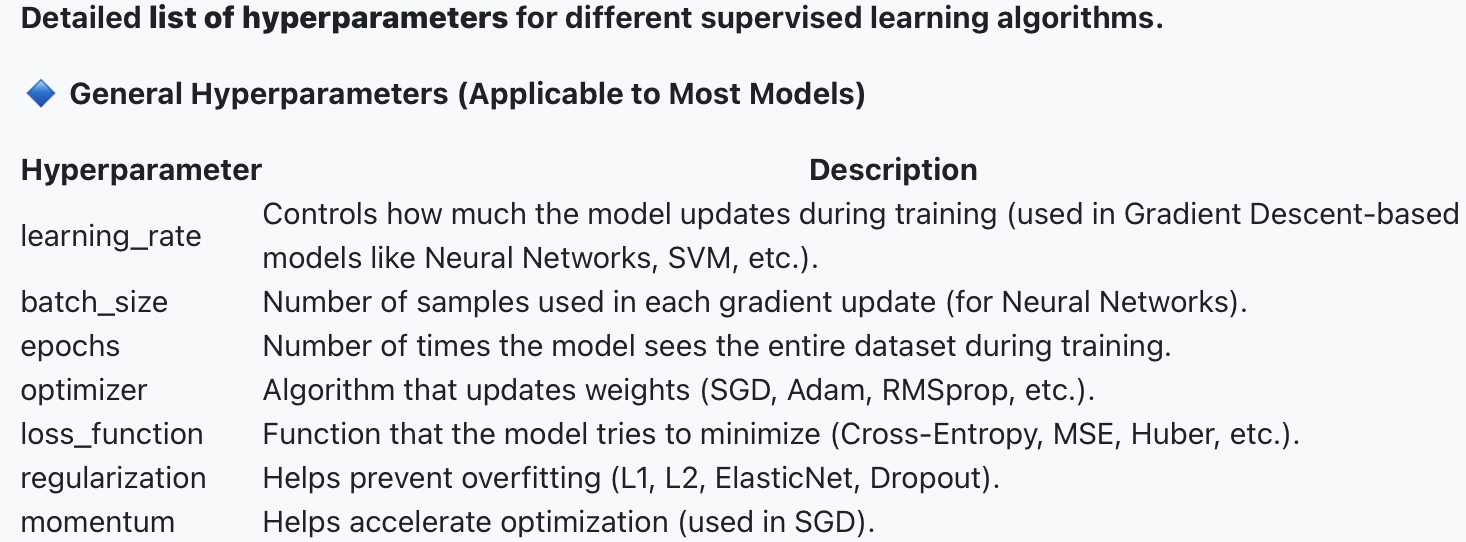

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import load_iris

# Load dataset
dataset = load_iris()

In [30]:
X, y = dataset.data, dataset.target

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [34]:
# Task 1: Hyperparameter Tuning for Each Classifier
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"max_depth": [3, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200]}
}

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
tuned_results = {}
for clf_name, clf in classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_results[clf_name] = accuracy
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}\n")

Best parameters for Logistic Regression: {'C': 1}
Accuracy: 1.00

Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Accuracy: 0.97

Best parameters for Decision Tree: {'max_depth': 10}
Accuracy: 1.00

Best parameters for Random Forest: {'n_estimators': 100}
Accuracy: 1.00



In [37]:
# Task 2: Impact of Activation Functions in MLP
activations = ["relu", "tanh", "logistic"]
mlp_results = {}

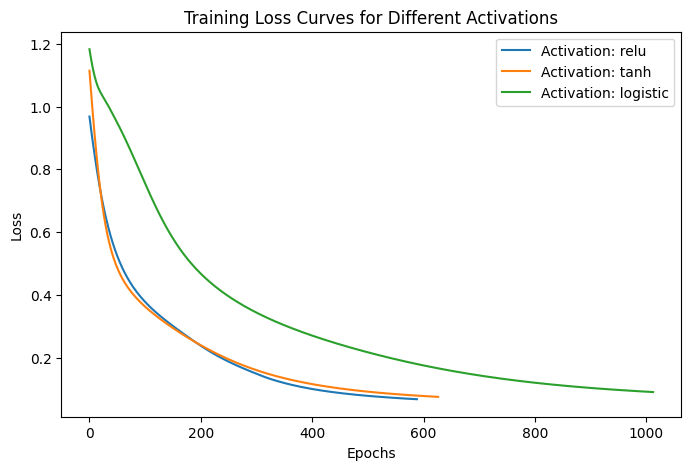

In [38]:
plt.figure(figsize=(8, 5))
for activation in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(50,), activation=activation, max_iter=10000, random_state=42)
    mlp.fit(X_train, y_train)
    loss_curve = mlp.loss_curve_
    plt.plot(loss_curve, label=f"Activation: {activation}")
    y_pred = mlp.predict(X_test)
    mlp_results[activation] = accuracy_score(y_test, y_pred)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curves for Different Activations")
plt.legend()
plt.show()

In [39]:
mlp_results

{'relu': 1.0, 'tanh': 0.9666666666666667, 'logistic': 0.9666666666666667}

In [40]:
# Task 3: Experiment with Learning Rate in MLP
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

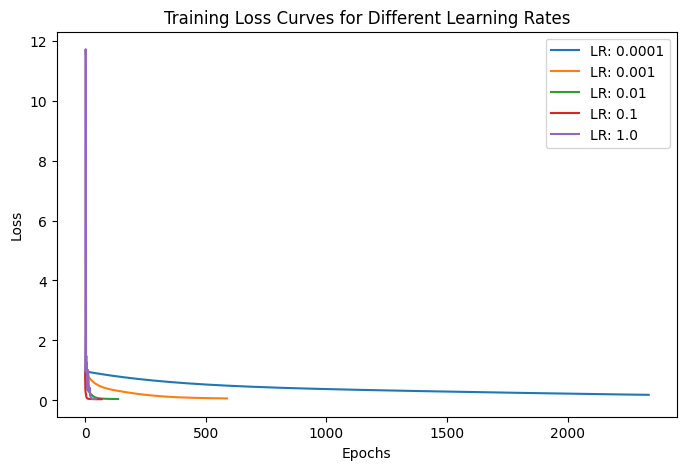

In [41]:
plt.figure(figsize=(8, 5))
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=lr, max_iter=10000, random_state=42)
    mlp.fit(X_train, y_train)
    loss_curve = mlp.loss_curve_
    plt.plot(loss_curve, label=f"LR: {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curves for Different Learning Rates")
plt.legend()
plt.show()